In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\noorh\Downloads\first inten project.csv")
df.columns = df.columns.str.strip()

In [100]:
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nNumber of duplicates before: {df.duplicated().sum()}")


Missing Values:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

Number of duplicates before: 0


C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


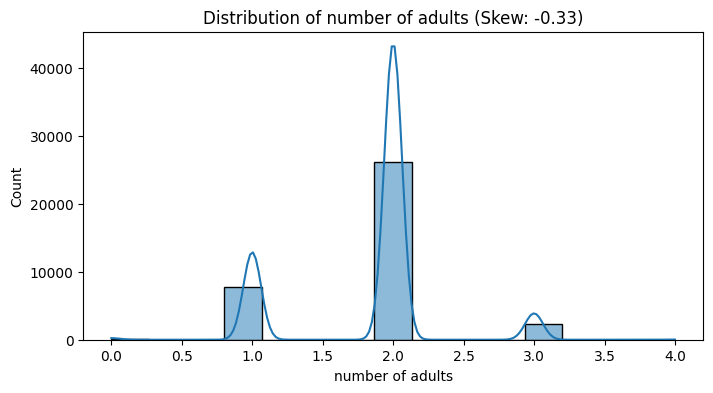

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


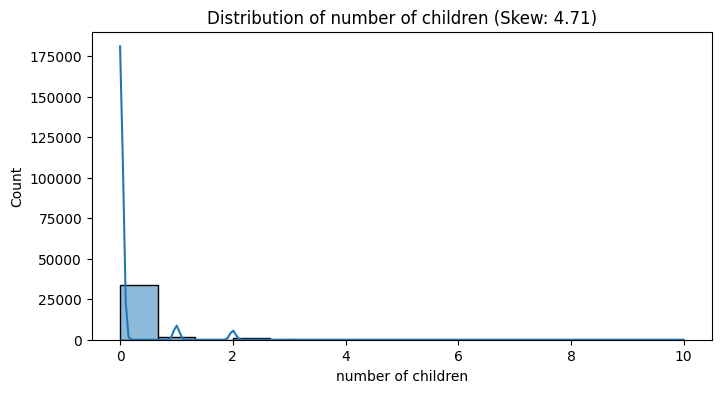

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


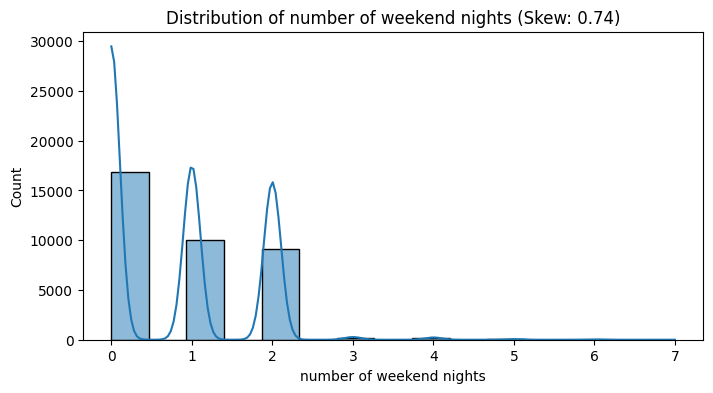

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


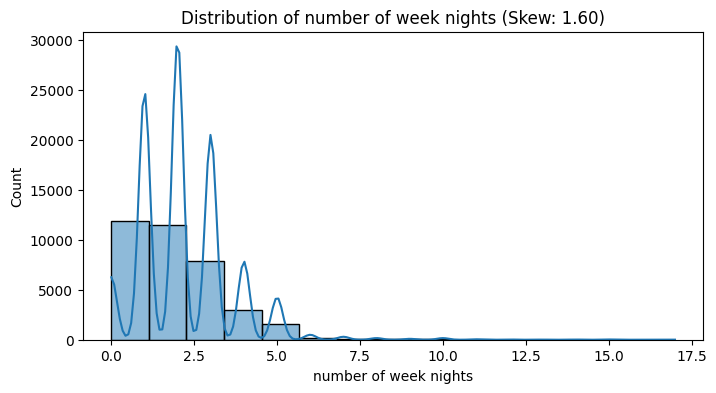

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


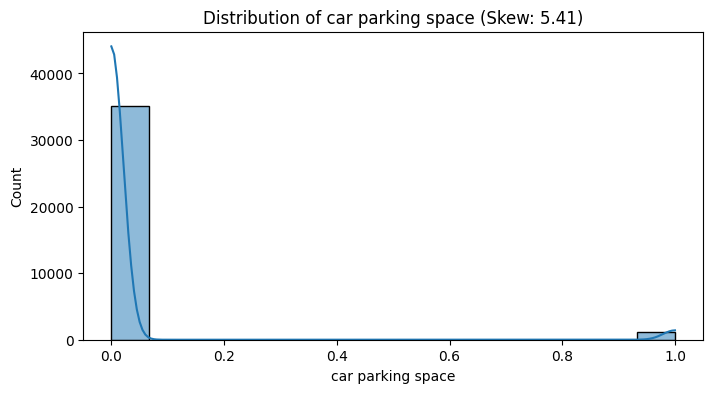

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


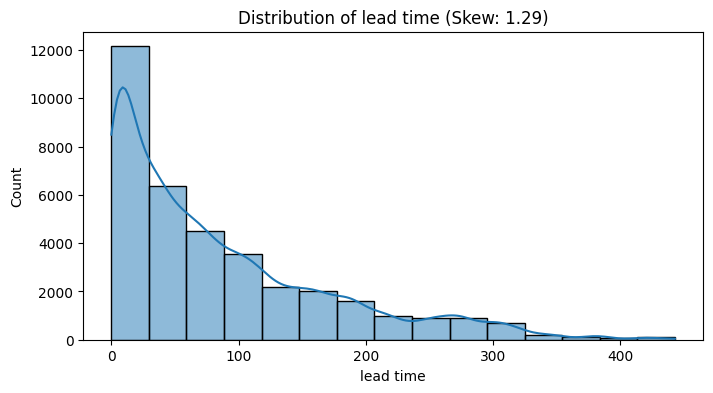

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


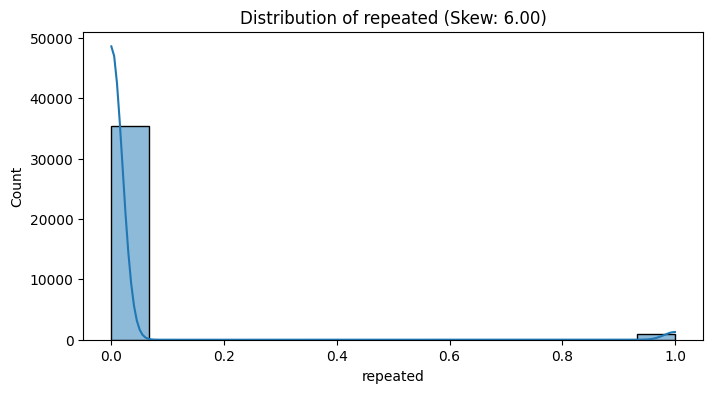

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


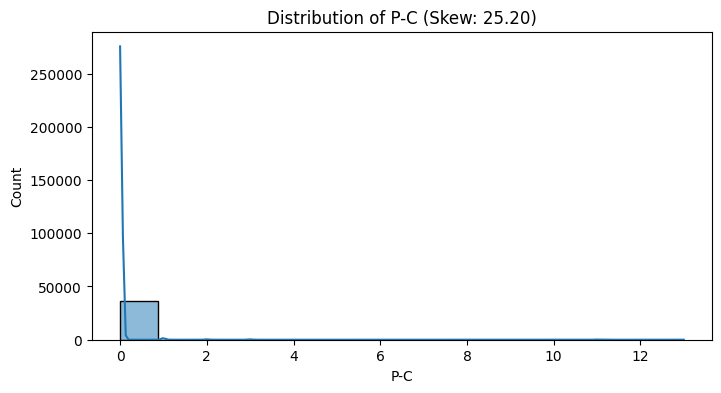

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


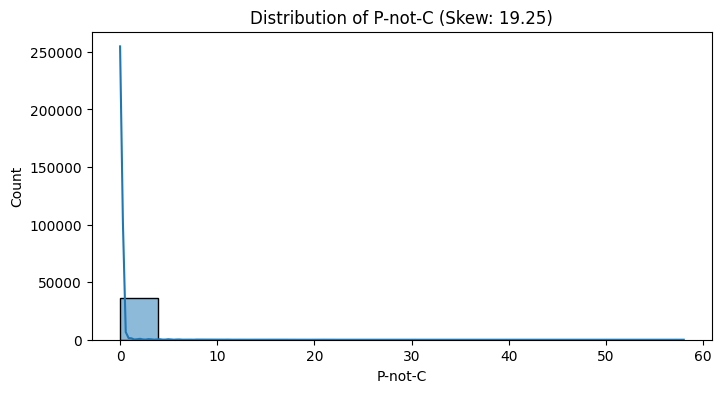

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


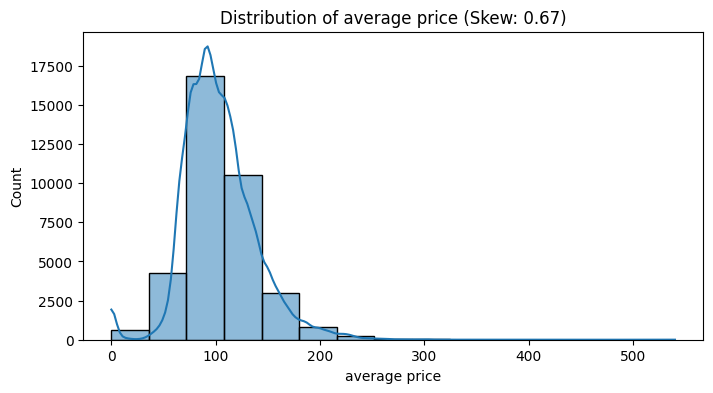

C:\Users\noorh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


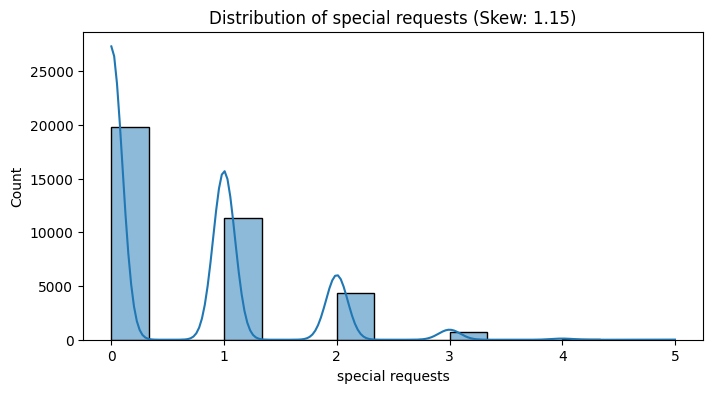

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col} (Skew: {df[col].skew():.2f})')
    plt.show()

In [102]:
def map_repeat_type(row):
    if row['repeated'] == 0:
        return 0
    elif row['P-C'] == 1 and row['P-not-C'] == 0:
        return 1
    elif row['P-C'] == 0 and row['P-not-C'] == 1:
        return 2
    else:
        return np.nan

df['repeat_type'] = df.apply(map_repeat_type, axis=1)
df.drop(columns=['repeated', 'P-C', 'P-not-C'], inplace=True)
df.dropna(subset=['repeat_type'], inplace=True)

In [103]:
cols = [
    'number of adults', 'number of children', 'number of week nights',
    'number of weekend nights', 'average price', 'special requests',
    'car parking space'
]
df_before = df[cols].copy()
df = df.drop(columns=['Booking_ID','date of reservation'])

In [104]:
df['number of adults'] = df['number of adults'].clip(lower=1, upper=3)
df['number of children'] = df['number of children'].clip(upper=5)
df['number of children'] = np.log1p(df['number of children'])

df['number of week nights'] = df['number of week nights'].clip(upper=6)
df['number of weekend nights'] = df['number of weekend nights'].clip(upper=5)
df['number of week nights'] = np.log1p(df['number of week nights'])
df['number of weekend nights'] = np.log1p(df['number of weekend nights'])

df['average price'] = df['average price'].clip(lower=20.75, upper=179.55)
df['average price'] = np.log1p(df['average price'])

df['special requests'] = df['special requests'].clip(upper=2)
df['car parking space'] = df['car parking space'].clip(upper=2)
df['car parking space'] = np.log1p(df['car parking space'])

# 5. One-Hot Encoding (للقيم الفئوية فقط)
df = pd.get_dummies(df, columns=[
    'type of meal', 'room type', 'market segment type', 'booking status'
], drop_first=True)


In [105]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


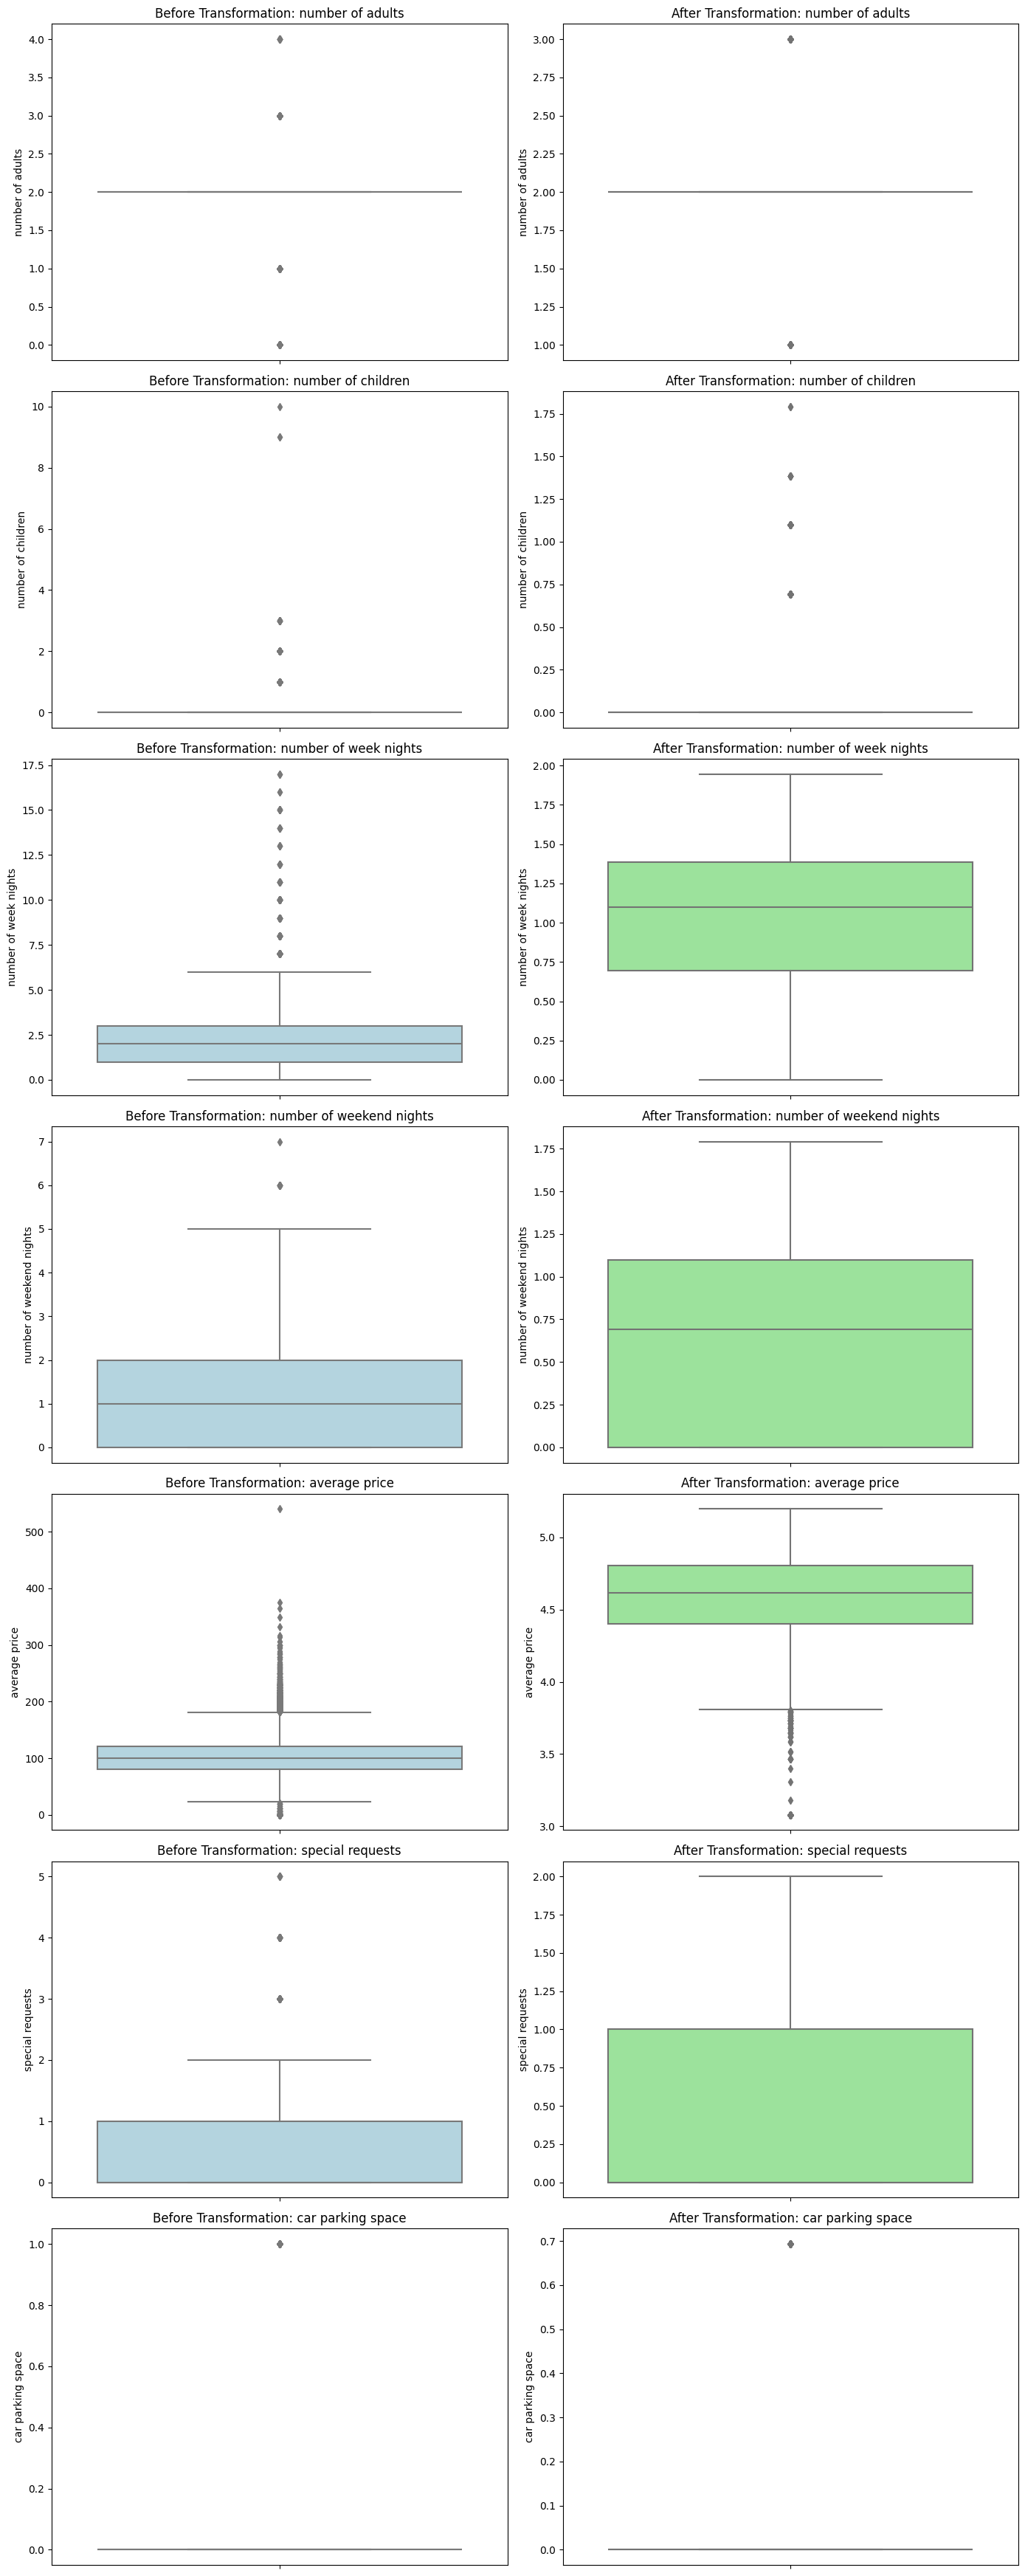

In [106]:
df_after = df[cols].copy()
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(14, 35))

for i, col in enumerate(cols):
    sns.boxplot(y=df_before[col], ax=axes[i, 0], color='lightblue')
    axes[i, 0].set_title(f"Before Transformation: {col}")
    sns.boxplot(y=df_after[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"After Transformation: {col}")

plt.tight_layout()
plt.show()

# 8. حفظ الملف النهائي
df_scaled.to_csv("final1_preprocessed_dataset.csv", index=False)

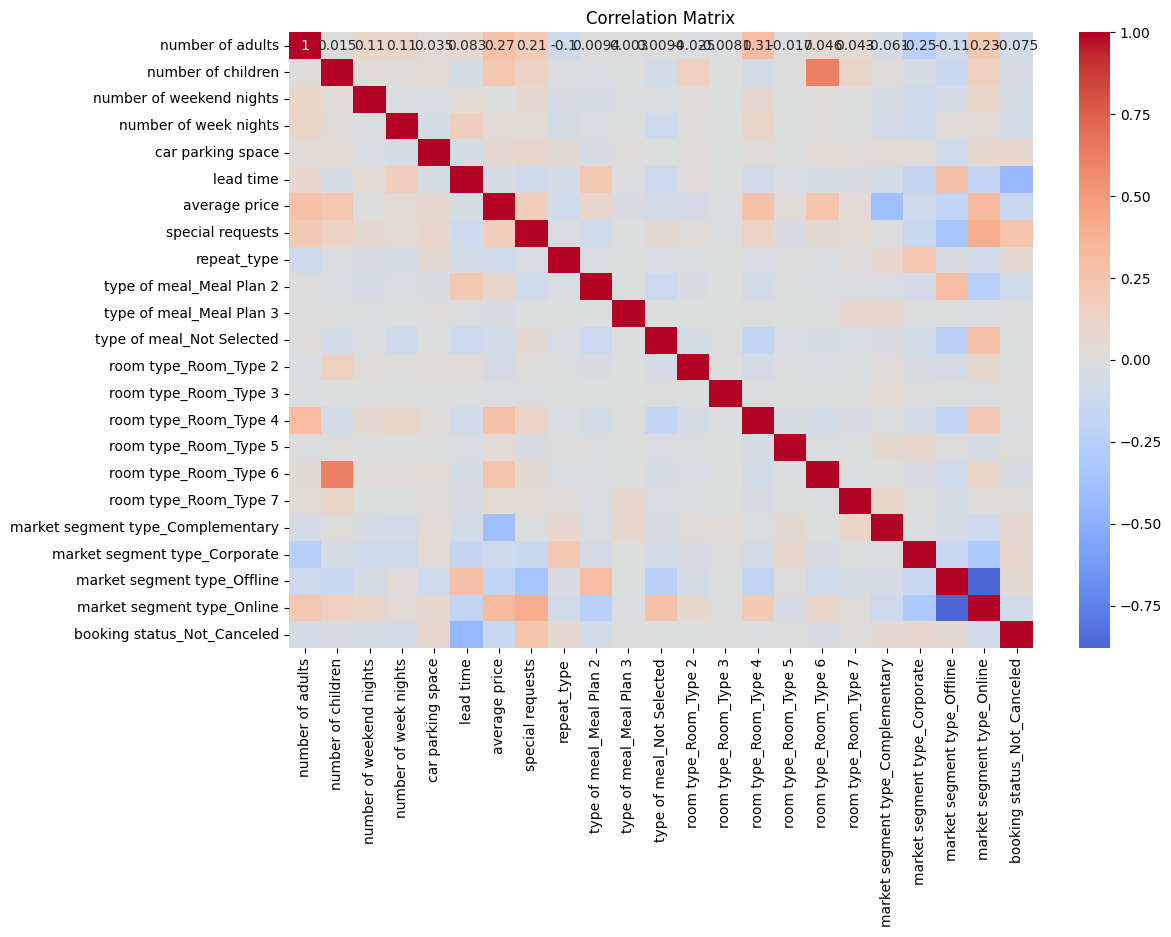


Highly correlated features:
[]

Final features after multicollinearity check:
Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time',
       'average price', 'special requests', 'repeat_type',
       'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3',
       'type of meal_Not Selected', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online', 'booking status_Not_Canceled'],
      dtype='object')


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

high_corr = np.where((corr_matrix > 0.7) & (corr_matrix < 1))
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y])
             for x, y in zip(*high_corr) if x < y]

print("\nHighly correlated features:")
print(high_corr)


print("\nFinal features after multicollinearity check:")
print(df.columns)
